In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math, warnings
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

sns.set()
#warnings.filterwarnings('ignore')

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
         author: daodeiv (David Stankov) 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" >
    </a>
  </p>      
</h2>   

<h1>Logistic Regression </h1>


<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#odds-ration'> Log-odds or Loggit function  </a> </li> <br>
         <li><a href='#origin'>The math origin of the Sigmoid function</a> </li><br>  
      <li><a href='#prop'> Properties and Identities Of Sigmoid Function</a> </li><br>  
      <li><a href='#max-li'> Maximum Likelyhood of Logistic regression, Cross-entropy Loss</a> </li><br>          
      <li><a href='#k-fold'>  K-fold cross validation </a> </li><br>       
      <li><a href='#ref'> References </a> </li><br>     
</ul>    
 </font>
  </h6>

Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.The best way to think about logistic regression is that it is a linear regression but for classification problems. Logistic regression essentially uses a logistic function defined below to model a binary output variable (Tolles & Meurer, 2016).The primary difference between linear regression and logistic regression is that logistic regression's range is bounded between 0 and 1. In addition, as opposed to linear regression, logistic regression does not require a linear relationship between inputs and output variables

<h2 id='odds-ration'> Log-odds or Loggit function </h2> 

The odds ratio is the probability to occur some event $A$ divided to the probability of not occur. <br> <br>
$$1) \; \; \; odds(p) = \frac{p(A)}{1-p(A)} $$ 
where $p(A)\in [0,1]$ Let's see the graphic of the function

<ipython-input-12-f62918826903>:2: RuntimeWarning: divide by zero encountered in true_divide
  odds =  p/(1-p)


Text(0, 0.5, 'odds(p)')

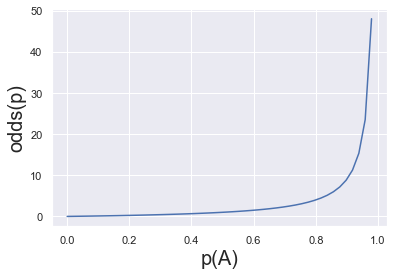

In [12]:
p = np.linspace(0,1)
odds =  p/(1-p)
plt.plot(p, odds)
plt.xlabel("p(A)", size='20')
plt.ylabel("odds(p)", size='20')

We can transform the Odds function into another more appropriate for the interpretation, without losing the underlying information. It is called Log-odds or Logit function. <br> <br>
</br>$$2)\; \; \; loggit(P) = \log(Odds)=\log{ \frac{P(A)}{1- P(A)} }   $$

plt.plot(p,np.log(odds))
plt.xlabel("p",size='20')
plt.ylabel("log-odds",size='20')

The properties of the function log-odds(p) that we should point out : <br> <br>
<ul> 
     <li> The logit function unlike Odds is symetric </li>
    <li> The loggit varies between $[-\infty:\infty]$ </li>
    <li> The logit in logistic regression is a special case of a link function in a generalized linear model: it is the canonical link function for the Bernoulli distribution. </li>
     <li> The logit function is the negative of the derivative of the binary entropy function.
The logit is also central to the probabilistic Rasch model for measurement, which has applications in psychological and educational assessment, among other areas. </li>
    <li>The inverse-logit function (i.e., the logistic function) is also sometimes referred to as the expit function.[7]
In plant disease epidemiology the logit is used to fit the data to a logistic model. With the Gompertz and Monomolecular models all three are known as Richards family models. </li>
    <li> The log-odds function of probabilities is often used in state estimation algorithms[8] because of its numerical advantages in the case of small probabilities. Instead of multiplying very small floating point numbers, log-odds probabilities can just be summed up to calculate the (log-odds) joint probability </li> 
 </ul>  

<h2 id='origin'>The math origin of the Sigmoid function  </h2>

The logistic regression is based on the assumption that log-odds  is a linear dependent on features values of the dataset.

$$ 3) \; \; log(\frac{p^i}{1-p^i})=h(x^i)$$ <br> where <br>
$$h(x^i)= \vartheta_0 + \vartheta_1 x^i_{1} + \vartheta_2 x_{2}^i+ ...\vartheta_p x_{p} $$

and $i$ is number of obeservation,
$x^i_m $ feature values,
$\vartheta_0$ intercept,
$\vartheta_{m}$ (weight) slope coeff. for each explanority var. <br> 

Let's do some math 

If we raise up both sides of eq 3) on a base $e$ : <br> <br>
$$e^{log(\frac{p^i}{1-p^i})} = e^{h(x^i)} 	\Leftrightarrow $$  <br> <br>
$$ \frac{p^i}{1-p^i} = e^{h(x^i)} \Leftrightarrow $$ <br> <br>
$$ p^i = e^{h(x^i)}-p.e^{h(x^i)} \Leftrightarrow  $$ <br> <br>
$$  p^i(1+e^{h(x^i)}  ) = e^{h(x^i)} \Leftrightarrow  $$ <br> <br>
$$p^i= \frac {e^{h(x^i)}} {1 +e^{h(x^i)}} \Leftrightarrow $$ <br> <br>

$$  p^i= \frac {e^{h(x^i)}e^{-h(x^i)}} {(1 +e^{h(x^i)})e^{h(x^i)}} \Leftrightarrow  $$ <br> <br>
$$p^i= \frac{1}{1 +e^{-h(x^i)} }   $$


usualy $p^i$ is written as $\sigma^i$ or $\sigma_i$ and it is called sigmoid

$$\sigma^i= \frac{1}{1 +e^{-h(x^i)} }   $$

<h2 id='prop'> Properties and Identities Of Sigmoid Function </h2>

The sigmoid function has very interesting properties.
Let's check out for example :  $$\sigma =\frac{1}{1 +e^{-(2.x + 4)}  }$$

In [17]:
# def sigmoid(x,a,b):
#     z = [i*a +b for i in x]
#     result = [1/(1+np.exp(-i)) for i in z ]
#     return result

def sigmoid(x,a,b):
    z = np.array([i*a +b for i in x])
    return 1/(1+np.exp(-z))

Text(0, 0.5, '$\\sigma(X)$')

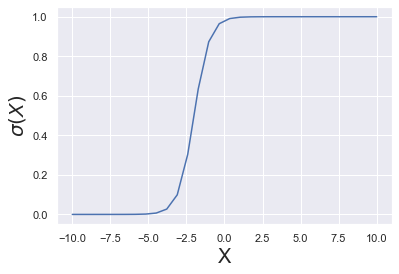

In [21]:
x = np.linspace(-10,10,30)
y =  sigmoid(x,2,4)
plt.plot(x,y)
plt.xlabel("X",size='20')
plt.ylabel(r'$\sigma(X)$',size='20')

The graph of sigmoid function is an S-shaped curve as above line in the graph.The main proporties : 
<ul>
    <li> It is difined in domain  $x\in[-\infty:\infty]$ </li>
    <li>The function is differentiable everywhere in its domain.</li>
    <li> The range of $\sigma$ =  $x\in(0:1)$ </li>
    <li> $\sigma(0)= 0.5 $ </li>
     <li>  The function is monotonically increasing. </li>
    <li>  The function is continuous everywhere. </li>
    <li> Numerically, it is enough to compute this function’s value over a small range of numbers, e.g., [-10, +10]. For values less than -10, the function’s value is almost zero. For values greater than 10, the function’s values are almost one.</li> 
    </ul>  <br>
By sigmoid function we can model binary output,  $\sigma(X) < 0.5 $ then the result is $0$ or 'False' otherwise $1$ or 'True'. <br>
Let's see the sigmoid with different weights $\vartheta_{0}$ and $ \vartheta_{1} $

In [24]:
def cartesian(start,end,step):
    x = y = np.linspace(start,end,step)
    return  np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
              
def plot(num):
    size = np.sqrt(num)  
    a = cartesian(1, 100, num)
    x = np.linspace(-10, 10, 30)
    size = int(size)
    fig, axs = plt.subplots(size, size,figsize=(25, 25))    
    for i in range(size):
        for j in range(size):
            t_1= 2**i/10 + i
            t_2 = 3**j - j
            axs[i, j].set_title(r'$ \theta_0 = {},\theta_1 = {} $'.format(t_1, t_2), size=20) 
            y=sigmoid(x, t_1, t_2)
            axs[i, j].plot(x, y)

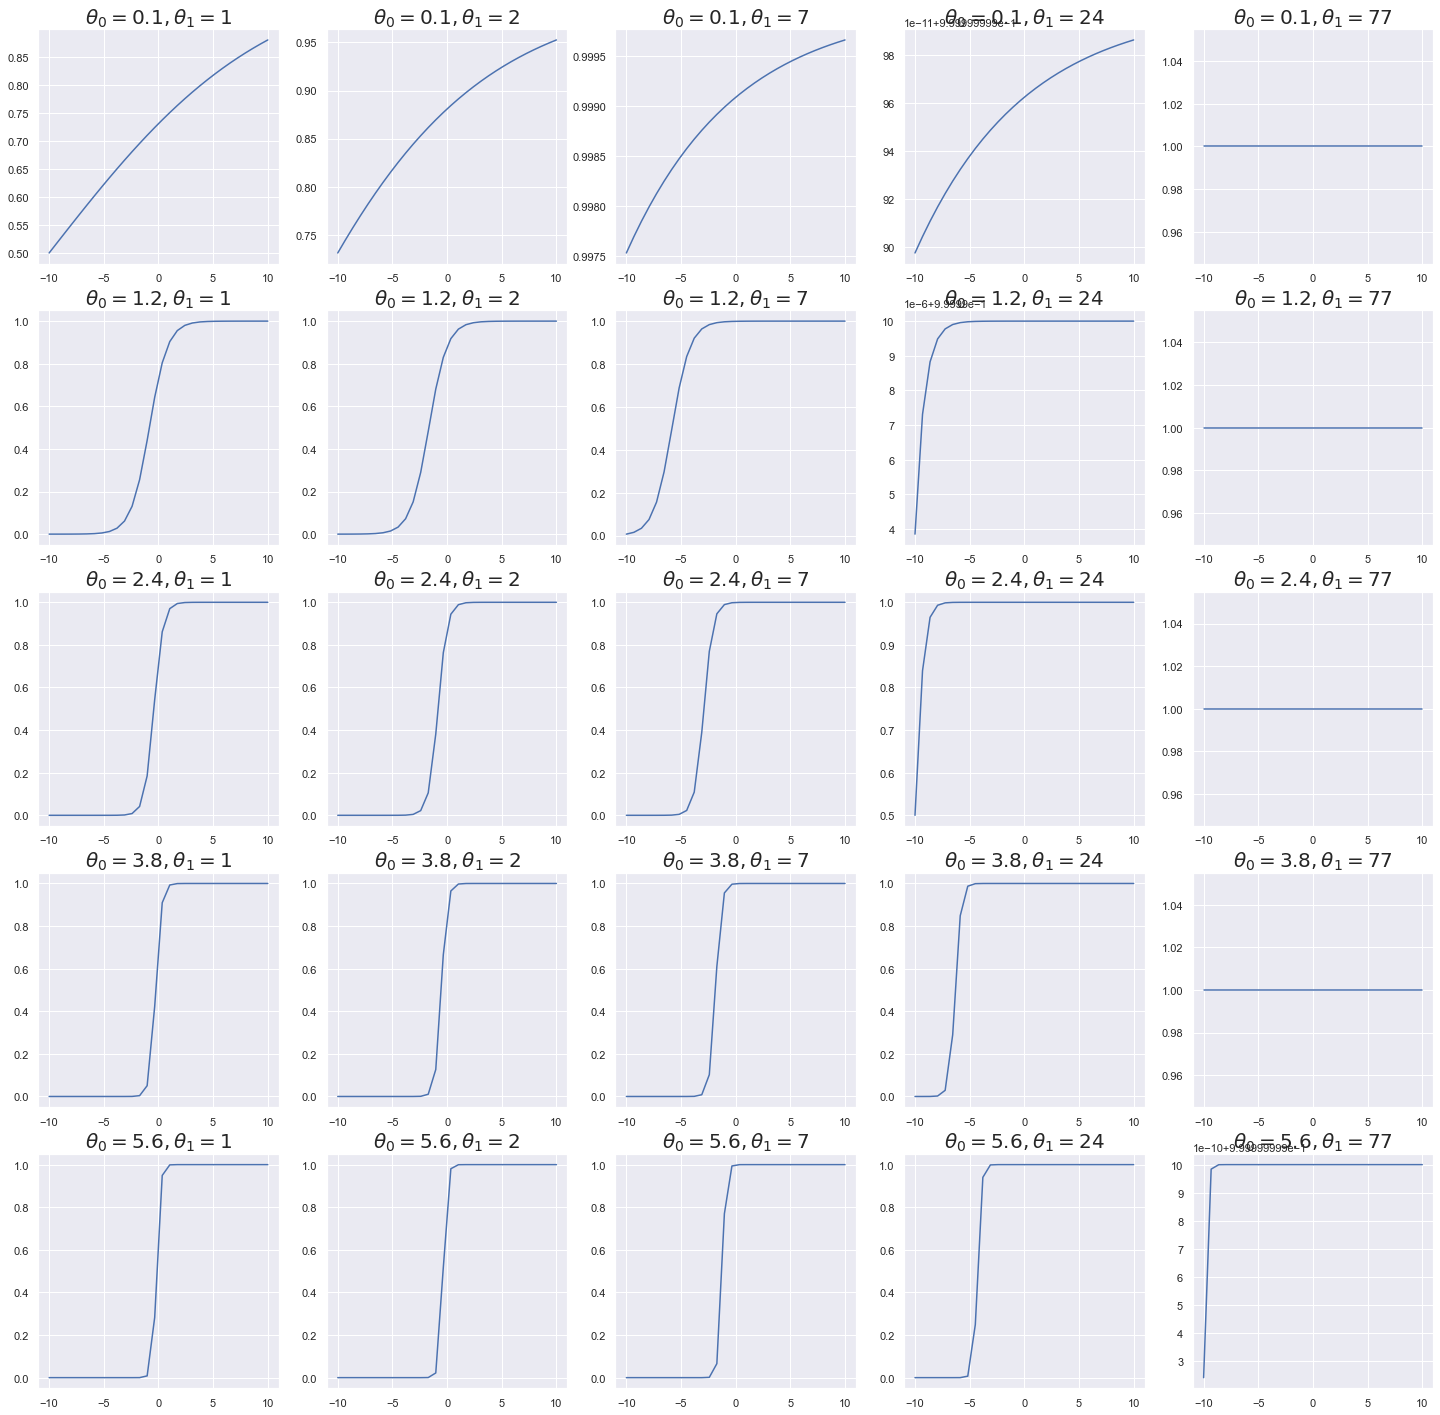

In [25]:
plot(25)

The purpose of Logistic regression is to find that curve that fits as well as possible given dataset.

<h2 id='max-li'> Maximum Likelyhood of Logistic regression, Cross-entropy loss </h2>

The logistic regression model is literally a model for the $p$ parameter of a binomial distribution.<br><br> 
   $$P(y_i|X,\theta) = \frac{n!}{y_i!(n-1)!} \sigma^{y_i}(1 - \sigma_i )^{n-y_i} $$
   
   when $n=1$ <br> <br>
   
   $$P(y_i|x_i,\theta) =\sigma^y_i(1 - \sigma_i )^{1-y_i}$$


Maximum Likelihood Estimation, or MLE for short, is a probabilistic framework for estimating the parameters of a model. In Maximum Likelihood Estimation, we wish to maximize the conditional probability according to observing data $(X)$ given a specific probability distribution and its parameters $(\theta)$, stated formally as:$P(y_i|X,\theta)$
because $y_i$ are independent,we can do joint probability : <br> <br>
$$ argmax_{\Theta} P(y_i|X,\theta) =  argmax_{\Theta} P(y_i|x_0,\theta)P(y_i|x_1,\theta)...P(y_i|x_n,\theta)=  argmax_{\Theta} \prod_{i=0}^{n}\sigma^y_i(1 - \sigma_i )^{1-y_i}$$



where $\sigma_i$ is sigmoid which our model specific probability distribution function sigmoid.

As same as linear regression we can maximize log Likelihood, because log is monotonic function and if we get minus of log :
$$3) \; \; log \big(\prod_{i=0}^{n}\sigma^y_i(1 - \sigma_i )^{1-y_i} \big) = \sum_i^m \big (y^i.\log\sigma^i + (y^i-1)\log{(1 -\sigma^i)}\big)$$

If we get the 3) with minus sign we can instead to maximize we can minimize that function : <br> <br>
                           $$\Theta = argmax_{\Theta}log \big(\prod_{i=0}^{n}\sigma^y_i(1 - \sigma_i )^{1-y_i} \big) = argmin_{\Theta}-log\big(\prod_{i=0}^{n}\sigma^y_i(1 - \sigma_i )^{1-y_i} \big) $$

Our pupose is to minimize $$4) \; \; \; \mathcal{L} = -\sum_i^m \big (y^i.\log\sigma^i + (y^i-1)\log{(1 -\sigma^i)}\big)$$

that eq is called <mark>$ cross-entropy \; loss$ </mark>.The next step is to optimized it in order to find its minima.

<h2> Mathematical derivation of cross-entopy loss.Gradient Descent </h2>

gradient descent   $$5) \; \;  \theta_m = \theta_m - \nabla_{\Theta_m} \mathcal{L}(\Theta)*h$$

Let's to find the partial derivate $\frac{\partial  \mathcal{L} (\Theta)}{\partial \theta_k}$

$\; \;\frac{\partial  \mathcal{L} (\Theta)}{\partial \theta_k} =  -\frac{1}{m}\sum_i^m\big(y^i\frac{\partial log(\sigma^i)}{\partial \theta_k}+  (1-y^i)\frac{\partial log(\sigma^i-1)}{\partial \theta_k}\big) $

$= -\frac{1}{m}\sum_i^m\big(y^i \frac{dlog(\sigma^i)}{d\sigma^i(\Theta,x^i_m)}\frac{\partial \sigma^i}{\partial \theta_k}+  (y^i-1) \frac{dlog(1- \sigma^i)}{d\sigma^i(\Theta,x^i_m)}\frac{\partial \sigma^i}{\partial \theta_k}\big)   $

$= -\frac{1}{m}\sum_i^m\big(y^i \frac{1}{\sigma^i}\frac{\partial \sigma^i}{\partial \theta_k}+  (y^i-1) \frac{1 }{1- \sigma^i}\frac{-\partial \sigma^i}{\partial \theta_k}\big)   $

let's calculate $\frac{\partial \sigma^i}{\partial \theta_k} = \frac{d(\frac{1}{1 +e^{-h(x^i)}})}{dh(x^i)}.\frac{\partial h(x^i)}{\partial \theta_k} =\frac{e^{-h(x^i)}}{(1+e^{-h(x^i)})^2}\frac{\partial h(x^i)}{\partial \theta_k} =\frac{1}{1+e^{- h(x^i)}}(1 -\frac{1}{1+e^{-h(x^i)}} )\frac{\partial h(x^i}{\partial \theta_k} = \sigma^i (1 - \sigma^i\frac{\partial h(x^i)}{\partial \theta_k}) $ and applying it above we achieve


$\; \;  \frac{\partial \mathcal{L} (\Theta)}{\partial \theta_k} =  -\frac{1}{m}\sum_i^m\big(y^i \frac{1}{\sigma^i}\sigma^i (1 - \sigma^i \frac{\partial h(x^i)}{\partial \theta_k} )+  (y^i-1) \frac{1 }{1- \sigma^i}.-\sigma^i(1 - \sigma^i\frac{\partial h(x^i)}{\partial \theta_k})  $ 

$= -\frac{1}{m}\sum_i^m\big(y^i\frac{\partial h(x^i)}{\partial \theta_k} -y^i \sigma^i\frac{\partial h(x^i)}{\partial \theta_k} +y^i\sigma^i\frac{\partial h(x^i)}{\partial \theta_k}- \sigma^i\frac{\partial h(x^i)}{\partial \theta_k}\big)$ 

$= -\frac{1}{m}\sum_i^m\big(y^i\frac{\partial h(x^i)}{\partial \theta_k}- \sigma^i\frac{\partial h(x^i)}{\partial \theta_k}\big)= -\frac{1}{m}\sum_i^m\big(y^i - \sigma^i\big)  \frac{\partial h(x^i)}{\partial \theta_k}$ 

for $\frac{\partial h(x^i)}{\partial \theta_k} = \frac{\partial \theta_mx^i_m}{\partial \theta_k} =  \delta_{mk}x^i_m = x^i_m$ applying this result above we will achieve (every k must be replace with m)

$$\frac{\partial \mathcal{L}(\Theta)}{\partial \theta_m} = - \frac{1}{m}\sum_i^m\big(y^i - \sigma^i\big)x^i_m$$

For every partial derivate we can write above in matrix form suitable for <mark>numy </mark> calculation

$$ \nabla_{\Theta_m} \mathcal{L} = \frac{1}{m} X^T(Y - \sigma)$$

<h2> Implementation of BinaryLogisticRegression using numpy </h2>

In [27]:
class BinaryLogisticRegression:

    def __init__(self):
        self.sample_weight = None
        self.X_prime = None
        self.Y_prime = None

    def fit(self, X, y, C=0.05, I=2500):
        self.X_prime, self.Y_prime = self.__validate(X, y)
        self.X_prime, self.sample_weight = self.__prepare(self.X_prime, self.Y_prime)
        m = 1 / X.shape[0]

        for i in range(I):
            gradient = m * self.X_prime.T.dot(self.__sigmoid__(self.X_prime, self.sample_weight) - self.Y_prime)
            self.sample_weight = self.sample_weight - gradient * C

    def score(self, X, y):
        X, y = self.__validate(X, y)
        y_p = self.predict(X)
        res = y - y_p
        correct = res[np.nonzero(res == 0)].shape[0]
        size = y_p.shape[0]
        return correct / size

    def predict(self, X):
        X, e = self.__validate(X, self.Y_prime)
        X, e = self.__prepare(X, self.Y_prime)
        return np.round(self.__sigmoid__(X, self.sample_weight))

    def __sigmoid__(self, X, wights):
        H = X.dot(wights)
        return 1 / (1 + np.exp(-H))

    def __validate(self, X, y):
        X = np.array(X)
        # y = np.array(y)
        y = np.array(y).reshape(y.shape[0], 1)
        return X, y
        if False:
            raise ValueError("Maximum number of iteration must be positive;"" got (max_iter=%r)" % self.max_iter)

    def __prepare(self, X, y):
        weights = None
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        weights = np.ones((X.shape[1], 1))
        return X, weights

We will test our implementation on <a href='https://www.kaggle.com/datasets/jacksonharper/data_banknote_authentication'> data baknote dataset <a>

In [29]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')
data.columns = ['variance','skewness','curtosis','entropy','Class'] 

In [30]:
data

,variance,skewness,curtosis,entropy,Class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [31]:
x = data.iloc[:, : -1]
y = data.iloc[:, -1]

scaler = StandardScaler()
x = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [33]:
r = BinaryLogisticRegression()
r.fit(X_train, y_train)
print('predictors weights')
print(r.sample_weight)
print('accuracy')
print(r.score(X_test, y_test))

predictors weights
[[-0.79795648]
 [-3.72638035]
 [-3.0569379 ]
 [-2.96198232]
 [ 0.36577552]]
accuracy
0.977924944812362


Let's to test the data on <mark>sklearn</mark> implemntation

In [37]:
from sklearn.linear_model import LogisticRegression


In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
print('predictors weights')
print(model.coef_ )
print('accuracy sklearn-learn implementation')
print(model.score(X_test, y_test))

predictors weights
[[-4.55543599 -4.47292913 -4.19422475  0.31206293]]
accuracy sklearn-learn implementation
0.9801324503311258


Little bit better than our implementation

<h2> Reguralization of Logistic Regression </h2>

<img src='https://raw.githubusercontent.com/monocasual/internalpointers-files/master/2018/04/machine-learning-overfitting-logistic-regression.png'><img />


Similar to the linear regression, even logistic regression is prone to overfitting
Above graph show that exatly as linear regression we can overfitten the model by increasing the polynomial degree, or just on data set has a multi-colianarity


We can use L1, L2 reguralization  in the same way as Linear regression to prevent overfitting

L1 Lasso $$ \; \;  \mathcal{L} = \sum_i^m \big (y^i.\log\sigma^i + (y^i-1)\log{(1 -\sigma^i)}\big) + \lambda \sum_j^m|\theta_j|$$


Ridge L2 
 $$ \; \;  \mathcal{L} = \sum_i^m \big (y^i.\log\sigma^i + (y^i-1)\log{(1 -\sigma^i)}\big) + \lambda \sum_j^m\theta_j^2 $$

<h2> References </h2>
[1] <a href='https://www.ibm.com/topics/logistic-regression#:~:text=Logistic%20regression%20estimates%20the%20probability,bounded%20between%200%20and%201.'>What is logistic regression?</a>
[2] <a href='